<p>&nbsp;</p>

### **Experimental Design**

<p>&nbsp;</p>

<font size = "3">

In this task, I will be retrieving annotations via Amazon Mechanical Turk for the audio valence of the lyrics 77 songs. Each song will be graded by 3 different turkers on a scale of sad, neutral, or happy. I chose to pay at a rate of 10 cents per song, at a maximum of 30 minutes time, giving the turkers a total of $7.70 for completing the assignment. I felt that this was fair given that that it is about twice the amount of federal minimum wage. My only requirement was that the turkers are able to read english.

<p>&nbsp;</p>

In [2]:
# Load packages
import pandas as pd

In [10]:
# Show a preview of the annotations for turker 1
turker1 = pd.read_csv("Batch_4607509_batch_results.csv")
for sample_number in range(0, 5):
    print(list(turker1["Input.Lyrics"])[sample_number], "\n")
    print(list(turker1["Answer.Audio Valence.label"])[sample_number], "\n")

when you walked by i saw a small tear in your eye lifted you up and threw you into the sun when you returned you were a little burned but you learned the secret of it all and you thought that you would burn but thatd be too easy it was only the end of the beginning cause now it can be elvis and me i thought you knew what it was that i had to do never occurred that you would just roll over i had to go not very long though you know guess for you it was an eternity and if you think youve got it now go start your crying its gonna be different when im home cause its gonna be elvis and me its just elvis and me its gonna be elvis and me just elvis and me just elvis and me and if you think youve got it now go start your crying its gonna be different when im home cause its gonna be elvis and me i wish i could fix it so that you understood if i cracked my head it would bleed like mercury the pieces of the poison raining above wont touch you now ill never let it again so if you think youve got it

In [11]:
# Show a preview of the annotations for turker 2
turker2 = pd.read_csv("Batch_4607507_batch_results.csv")
for sample_number in range(0, 5):
    print(list(turker2["Input.Lyrics"])[sample_number], "\n")
    print(list(turker2["Answer.Audio Valence.label"])[sample_number], "\n")

when you walked by i saw a small tear in your eye lifted you up and threw you into the sun when you returned you were a little burned but you learned the secret of it all and you thought that you would burn but thatd be too easy it was only the end of the beginning cause now it can be elvis and me i thought you knew what it was that i had to do never occurred that you would just roll over i had to go not very long though you know guess for you it was an eternity and if you think youve got it now go start your crying its gonna be different when im home cause its gonna be elvis and me its just elvis and me its gonna be elvis and me just elvis and me just elvis and me and if you think youve got it now go start your crying its gonna be different when im home cause its gonna be elvis and me i wish i could fix it so that you understood if i cracked my head it would bleed like mercury the pieces of the poison raining above wont touch you now ill never let it again so if you think youve got it

In [12]:
# Show a preview of the annotations for turker 3
turker3 = pd.read_csv("Batch_4607506_batch_results.csv")
for sample_number in range(0, 5):
    print(list(turker3["Input.Lyrics"])[sample_number], "\n")
    print(list(turker3["Answer.Audio Valence.label"])[sample_number], "\n")

when you walked by i saw a small tear in your eye lifted you up and threw you into the sun when you returned you were a little burned but you learned the secret of it all and you thought that you would burn but thatd be too easy it was only the end of the beginning cause now it can be elvis and me i thought you knew what it was that i had to do never occurred that you would just roll over i had to go not very long though you know guess for you it was an eternity and if you think youve got it now go start your crying its gonna be different when im home cause its gonna be elvis and me its just elvis and me its gonna be elvis and me just elvis and me just elvis and me and if you think youve got it now go start your crying its gonna be different when im home cause its gonna be elvis and me i wish i could fix it so that you understood if i cracked my head it would bleed like mercury the pieces of the poison raining above wont touch you now ill never let it again so if you think youve got it

In [19]:
# Show a preview of the annotations for my ground truth
ground_truth = pd.read_csv("my_ground_truth.csv")
for sample_number in range(0, 5):
    print(list(ground_truth["Lyrics"])[sample_number], "\n")
    print(list(ground_truth["MyAnswer"])[sample_number], "\n")

when you walked by i saw a small tear in your eye lifted you up and threw you into the sun when you returned you were a little burned but you learned the secret of it all and you thought that you would burn but thatd be too easy it was only the end of the beginning cause now it can be elvis and me i thought you knew what it was that i had to do never occurred that you would just roll over i had to go not very long though you know guess for you it was an eternity and if you think youve got it now go start your crying its gonna be different when im home cause its gonna be elvis and me its just elvis and me its gonna be elvis and me just elvis and me just elvis and me and if you think youve got it now go start your crying its gonna be different when im home cause its gonna be elvis and me i wish i could fix it so that you understood if i cracked my head it would bleed like mercury the pieces of the poison raining above wont touch you now ill never let it again so if you think youve got it

<p>&nbsp;</p>

### **Experimental Outcome**

<p>&nbsp;</p>

<font size = "3">

It took about an hour to get all of the labels. While the turkers were initially found almost immediately, two of them took about 30 minutes to finish and the other one took about an hour to finish. I was expecting the assignment to take about 30 minutes. I think it is a good sign that the turkers were taking their time, hopefully they read through the song lyrics and made the best and honest conclusion they could.

<p>&nbsp;</p>

<p>&nbsp;</p>

### **Results Exploration**

<p>&nbsp;</p>

<font size = "3">

Taking a look at the amount of time in seconds that it took each turker to complete each label might be an indication into if there was any spam. For example, what if one turker took 5 minutes but another turker was able to do it in 20 seconds? Furthermore, what if there was disagreement on the label? In the following section, I will explore this phenomena little bit more with hopes to flag some of the songs where this anomaly may have occurred.

<p>&nbsp;</p>

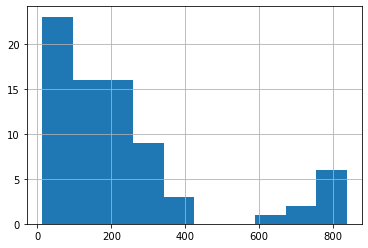

In [13]:
# Show a distribution for turker1
import matplotlib.pyplot as plt
turker1.WorkTimeInSeconds.hist()
plt.show()

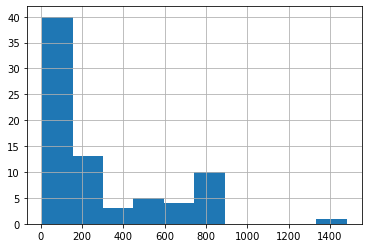

In [14]:
# Show a distribution for turker2
turker2.WorkTimeInSeconds.hist()
plt.show()

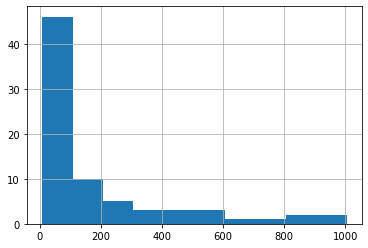

In [15]:
# Show a distribution for turker3
turker3.WorkTimeInSeconds.hist()
plt.show()

In [18]:
# Show a correlation matrix
pd.DataFrame(list(zip(
    turker1.WorkTimeInSeconds,
    turker2.WorkTimeInSeconds,
    turker3.WorkTimeInSeconds)),
    columns = ["T1", "T2", "T"]
).corr()

,T1,T2,T
T1,1.000000,0.189394,0.067702
T2,0.189394,1.000000,-0.004448
T,0.067702,-0.004448,1.000000


<p>&nbsp;</p>

<font size = "3">

The amount of time it took the turkers to answer the questions was not consistent. Looking at the distributions, it is evident that each turker answered most of the questions relatively fast, but then some of the questions were answered very slow. It is possible that some of the songs just took longer to read than others. But then I would expect that the turkers would answer the same questions fast and the same questions slow. This was not the case, the correlation matrix shows that there is little to no correlation between any of the turkers. I wonder if the reason for the inconsistency is because the turkers were multitasking or got distracted. Next I will look at the Cohen's Kappa scores between the turkers to see how similar their answers were.

<p>&nbsp;</p>

In [28]:
# Calculate the pair wise cohens kappa scores for the turkers
from sklearn.metrics import cohen_kappa_score

print(cohen_kappa_score(
    turker1["Answer.Audio Valence.label"],
    turker2["Answer.Audio Valence.label"]))

print(cohen_kappa_score(
    turker1["Answer.Audio Valence.label"],
    turker3["Answer.Audio Valence.label"]
))

print(cohen_kappa_score(
    turker2["Answer.Audio Valence.label"],
    turker3["Answer.Audio Valence.label"]
))

0.04610655737704916
0.12984647410876926
0.15642746515229733


In [30]:
# What is the average kappa score for the turkers
(0.046 + 0.130 + 0.156) / 3

0.11066666666666665

In [32]:
# Calculate the kappa score for each turker and my ground truth
print(cohen_kappa_score(
    ground_truth["MyAnswer"],
    turker1["Answer.Audio Valence.label"]
))

print(cohen_kappa_score(
    ground_truth["MyAnswer"],
    turker2["Answer.Audio Valence.label"]
))

print(cohen_kappa_score(
    ground_truth["MyAnswer"],
    turker3["Answer.Audio Valence.label"]
))

0.05983337541024991
-0.04223806911684047
0.09896907216494844


In [36]:
# What were the marginal distributions for each of the turkers and me?
print("Turker 1")
print(turker1["Answer.Audio Valence.label"].value_counts(), "\n")
print("Turker 2")
print(turker2["Answer.Audio Valence.label"].value_counts(), "\n")
print("Turker 3")
print(turker3["Answer.Audio Valence.label"].value_counts(), "\n")
print("Ground Truth")
print(ground_truth["MyAnswer"].value_counts(), "\n")

Turker 1
Happy      28
Sad        27
Neutral    21
Name: Answer.Audio Valence.label, dtype: int64 

Turker 2
Neutral    34
Happy      24
Sad        18
Name: Answer.Audio Valence.label, dtype: int64 

Turker 3
Sad        27
Happy      25
Neutral    24
Name: Answer.Audio Valence.label, dtype: int64 

Ground Truth
Neutral    42
Sad        19
Happy      15
Name: MyAnswer, dtype: int64 



<p>&nbsp;</p>

### **Conclusion**

<p>&nbsp;</p>

<font size = "3">

There was not a lot of agreement between the turkers and myself. The highest kappa score was a 0.15 between turker 2 and 3. I was a little bit surprised at first to see that there was so much disagreement. I think that the ambiguity is the main reason for the discrepancies. It is difficult to decide whether a song is sad, neutral, or happy just based on the lyrics. I think part of that is because there is no way to tell what the sounds are like. This is why I picked neutral for a lot of my annotations because I could not decipher one way or another.

Although there is not much else to say about the results of this experiment, I did learn an important lesson about using human annotators. It is paramoount that the instructions are clear and that the labels are not ambiguous. In other words, try to be objective as possible. This will leave little room for subjectivity and hopefully lead to more consistent results across annotators and a better cohens kappa score.

<p>&nbsp;</p>